**Общая информация**

**Срок сдачи:** 18 октября 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 18 октября, -4 балла после 06:00 25 октября, -6 баллов после 06:00 1 ноября

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush
Дополнительно нужно просто скинуть ссылку в slack в личный чат

Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе. Score не должен уступать значению KNN из sklearn

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 4 (3 балла)
Добавить algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Значение n_neighbors нужно взять из задания 3. Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy. Score не должен уступать значению KNN из sklearn

###### Задание 5 (1 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять структуру кода и текст. В противном случае -1 балл


In [40]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KDTree
#%load_ext pycodestyle_magic

In [41]:
#%%pycodestyle

class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin, ClassifierMixin):
    
    def __init__(self, n_neighbors = 3, algorithm='brute'):
        self.neighbors = n_neighbors
        self.algorithm = algorithm
    
    def fit(self, X, y):
        self.x_train = np.array(X).astype(float)
        self.y_train = np.array(y).astype(int)
        self.y_label = np.unique(y)
        #self.y_dist = (self.x_train ** 2).sum(axis=1)
        if self.algorithm == 'kd_tree':
            self.tree = KDTree(self.x_train)
    
    def predict(self, X):
        return self.predict_proba(X).argmax(axis = 1)
    
    def predict_proba(self, X):
        if self.algorithm == 'brute':
            return self.pp_brute(X)
        if self.algorithm == 'kd_tree':
            return self.pp_kd(X)
    def score(self, X, y):
        return (y == self.predict(X)).sum() / X.shape[0]
    
    def pp_brute(self, X):
        dist = np.array([((self.x_train - X[i]) ** 2).sum(axis = 1) for i in range(np.shape(X)[0])])
        neig_arg = np.argsort(dist)[:, :self.neighbors]
        otvet = np.zeros((X.shape[0], self.y_label.shape[0]))
        for i in range(X.shape[0]):
            for j in neig_arg[i]:
                otvet[i, int(self.y_train[j])] += 1
        return otvet / self.neighbors
        
      
    def pp_kd(self, X):
        X = X.astype(float)
        dist, k_pred = self.tree.query(X, k=self.neighbors)
        predict = np.zeros((np.shape(X)[0], np.shape(self.y_label)[0]))
        for i in range(np.shape(k_pred)[0]):
            for j in k_pred[i]:
                predict[i][int(self.y_train[j])] += 1
        return predict / self.neighbors
            
            
            
            
            

**IRIS**

In [42]:
iris = datasets.load_iris()

In [43]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [44]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [45]:
%time clf.fit(X_train, y_train)

CPU times: user 1.52 ms, sys: 0 ns, total: 1.52 ms
Wall time: 1.22 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [46]:
%time my_clf.fit(X_train, y_train)

CPU times: user 281 µs, sys: 29 µs, total: 310 µs
Wall time: 391 µs


In [47]:
%time clf.predict(X_test)

CPU times: user 735 µs, sys: 76 µs, total: 811 µs
Wall time: 620 µs


array([0, 0, 1, 2, 2, 0, 0, 1, 2, 2, 2, 2, 1, 1, 0])

In [48]:
%time my_clf.predict(X_test)

CPU times: user 812 µs, sys: 83 µs, total: 895 µs
Wall time: 629 µs


array([0, 0, 1, 2, 2, 0, 0, 1, 2, 2, 2, 2, 1, 1, 0])

In [49]:
%time clf.predict_proba(X_test)

CPU times: user 792 µs, sys: 0 ns, total: 792 µs
Wall time: 801 µs


array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [50]:
%time my_clf.predict_proba(X_test)

CPU times: user 2.31 ms, sys: 0 ns, total: 2.31 ms
Wall time: 2.12 ms


array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [51]:
clf.score(X_test, y_test)

0.9333333333333333

In [52]:
my_clf.score(X_test, y_test)

0.9333333333333333

Задание 3

Sklearn n_neighbors =  18
My n_neighbors =  18


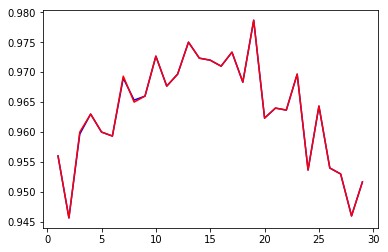

In [53]:
from sklearn.metrics import accuracy_score

kol = 200
neighbors = range(1, 30)
errors_stand = []
errors_my = []
for k in neighbors:
    er_stand_std = 0
    er_my_std = 0
    for i in range(kol):
        X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)
        knt = KNeighborsClassifier(n_neighbors=k)
        my_knt = MyKNeighborsClassifier(n_neighbors=k)
        knt.fit(X_train, y_train)
        my_knt.fit(X_train, y_train)
        er_stand_std = er_stand_std + accuracy_score(knt.predict(X_test), y_test)
        er_my_std = er_my_std + accuracy_score(my_knt.predict(X_test), y_test)
    errors_stand.append(er_stand_std/kol)
    errors_my.append(er_my_std/kol)

plt.plot(neighbors, errors_stand, color='blue')
plt.plot(neighbors, errors_my, color='red')
print("Sklearn n_neighbors = ", errors_stand.index(max(errors_stand)))
print("My n_neighbors = ", errors_my.index(max(errors_my)))


**MNIST**

In [54]:
mnist = fetch_mldata('MNIST original')

In [55]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [56]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [57]:
%time clf.fit(X_train, y_train)

CPU times: user 25.5 s, sys: 186 ms, total: 25.7 s
Wall time: 25.6 s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [58]:
%time my_clf.fit(X_train, y_train)

CPU times: user 471 ms, sys: 163 ms, total: 635 ms
Wall time: 212 ms


In [59]:
%time clf.predict(X_test)

CPU times: user 1min 10s, sys: 43.7 ms, total: 1min 10s
Wall time: 1min 10s


array([5., 3., 8., 5., 9., 2., 7., 1., 0., 6., 1., 5., 5., 6., 7., 3., 9.,
       5., 7., 7., 6., 0., 4., 1., 7., 7., 8., 4., 1., 0., 0., 4., 9., 7.,
       5., 5., 2., 0., 4., 2., 2., 4., 7., 7., 8., 0., 0., 8., 1., 2., 6.,
       1., 1., 4., 3., 3., 0., 7., 2., 9., 0., 3., 5., 7., 6., 4., 2., 5.,
       6., 4., 8., 4., 3., 2., 9., 9., 0., 0., 4., 7., 8., 7., 9., 6., 6.,
       4., 1., 4., 2., 0., 2., 1., 1., 6., 1., 2., 1., 8., 7., 1., 1., 7.,
       4., 7., 5., 4., 9., 7., 2., 2., 5., 5., 3., 3., 8., 5., 4., 0., 7.,
       0., 0., 5., 9., 6., 3., 1., 9., 9., 4., 4., 2., 9., 3., 0., 6., 8.,
       6., 6., 2., 6., 8., 6., 5., 7., 7., 9., 9., 0., 8., 8., 6., 9., 6.,
       5., 1., 5., 7., 7., 1., 3., 7., 1., 6., 0., 5., 2., 6., 7., 6., 0.,
       3., 5., 9., 0., 6., 0., 1., 1., 8., 9., 2., 3., 4., 4., 9., 9., 9.,
       2., 4., 1., 3., 7., 9., 7., 4., 5., 1., 4., 3., 3., 1., 3., 2., 5.,
       0., 7., 9., 1., 6., 6., 8., 3., 0., 0., 7., 6., 6., 2., 0., 9., 4.,
       4., 4., 9., 2., 2.

In [60]:
%time my_clf.predict(X_test)

CPU times: user 10min 6s, sys: 1min 29s, total: 11min 36s
Wall time: 3min 30s


array([5, 3, 8, 5, 9, 2, 7, 1, 0, 6, 1, 5, 5, 6, 7, 3, 9, 5, 7, 7, 6, 0,
       4, 1, 7, 7, 8, 4, 1, 0, 0, 4, 9, 7, 5, 5, 2, 0, 4, 2, 2, 4, 7, 7,
       8, 0, 0, 8, 1, 2, 6, 1, 1, 4, 3, 3, 0, 7, 2, 9, 0, 3, 5, 7, 6, 4,
       2, 5, 6, 4, 8, 4, 3, 2, 9, 9, 0, 0, 4, 7, 8, 7, 9, 6, 6, 4, 1, 4,
       2, 0, 2, 1, 1, 6, 1, 2, 1, 8, 7, 1, 1, 7, 4, 7, 5, 4, 9, 7, 2, 2,
       5, 5, 3, 3, 8, 5, 4, 0, 7, 0, 0, 5, 9, 6, 3, 1, 9, 9, 4, 4, 2, 9,
       3, 0, 6, 8, 6, 6, 2, 6, 8, 6, 5, 7, 7, 9, 9, 0, 8, 8, 6, 9, 6, 5,
       1, 5, 7, 7, 1, 3, 7, 1, 6, 0, 5, 2, 6, 7, 6, 0, 3, 5, 9, 0, 6, 0,
       1, 1, 8, 9, 2, 3, 4, 4, 9, 9, 9, 2, 4, 1, 3, 7, 9, 7, 4, 5, 1, 4,
       3, 3, 1, 3, 2, 5, 0, 7, 9, 1, 6, 6, 8, 3, 0, 0, 7, 6, 6, 2, 0, 9,
       4, 4, 4, 9, 2, 2, 3, 6, 2, 1, 1, 2, 1, 5, 0, 7, 8, 1, 7, 9, 9, 5,
       1, 3, 4, 5, 0, 7, 5, 5, 0, 7, 4, 0, 2, 5, 2, 0, 8, 0, 4, 4, 1, 6,
       2, 4, 4, 8, 9, 0, 6, 5, 7, 0, 2, 0, 3, 0, 6, 7, 3, 0, 8, 6, 0, 9,
       6, 8, 5, 3, 9, 6, 0, 3, 2, 5, 5, 1, 2, 9, 0,

In [61]:
%time clf.predict_proba(X_test)

CPU times: user 1min 12s, sys: 22 ms, total: 1min 12s
Wall time: 1min 12s


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [62]:
%time my_clf.predict_proba(X_test)

CPU times: user 10min, sys: 1min 30s, total: 11min 31s
Wall time: 3min 33s


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [63]:
clf.score(X_test, y_test)

0.9871428571428571

In [64]:
my_clf.score(X_test, y_test)

0.9871428571428571

Задание 4

In [65]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [66]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [67]:
%time clf.fit(X_train, y_train)

CPU times: user 23.3 s, sys: 171 ms, total: 23.5 s
Wall time: 23.4 s


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [68]:
%time my_clf.fit(X_train, y_train)

CPU times: user 23.3 s, sys: 205 ms, total: 23.5 s
Wall time: 22.9 s


In [69]:
%time clf.predict(X_test)

CPU times: user 1min 5s, sys: 25.4 ms, total: 1min 5s
Wall time: 1min 5s


array([9., 7., 4., 0., 8., 2., 2., 1., 0., 8., 4., 5., 2., 1., 9., 9., 1.,
       4., 3., 2., 0., 5., 6., 7., 6., 2., 2., 3., 3., 1., 2., 1., 7., 4.,
       5., 7., 2., 5., 6., 2., 8., 9., 7., 7., 4., 4., 1., 5., 5., 6., 2.,
       7., 0., 6., 8., 7., 2., 6., 1., 5., 5., 4., 4., 6., 9., 0., 2., 3.,
       8., 4., 4., 7., 2., 0., 3., 3., 7., 5., 9., 6., 3., 9., 9., 3., 2.,
       2., 9., 9., 0., 6., 7., 7., 4., 3., 8., 9., 6., 0., 1., 9., 4., 4.,
       2., 6., 1., 3., 6., 5., 2., 9., 8., 6., 7., 0., 3., 8., 6., 2., 7.,
       8., 3., 7., 9., 3., 4., 5., 2., 6., 3., 5., 9., 0., 4., 4., 7., 3.,
       8., 1., 3., 2., 4., 8., 1., 6., 5., 0., 8., 3., 1., 6., 6., 5., 6.,
       0., 9., 3., 0., 0., 6., 1., 2., 5., 1., 9., 0., 9., 1., 9., 7., 5.,
       5., 9., 0., 8., 3., 2., 6., 8., 0., 9., 7., 1., 2., 6., 1., 6., 4.,
       4., 1., 8., 4., 8., 6., 7., 2., 6., 0., 1., 2., 7., 6., 9., 4., 6.,
       2., 7., 4., 7., 0., 1., 1., 7., 0., 0., 9., 5., 5., 1., 3., 7., 2.,
       7., 9., 9., 2., 8.

In [70]:
%time my_clf.predict(X_test)

CPU times: user 55.6 s, sys: 17.2 ms, total: 55.6 s
Wall time: 55.6 s


array([9, 7, 4, 0, 8, 2, 2, 1, 0, 8, 4, 5, 2, 1, 9, 9, 1, 4, 3, 2, 0, 5,
       6, 7, 6, 2, 2, 3, 3, 1, 2, 1, 7, 4, 5, 7, 2, 5, 6, 2, 8, 9, 7, 7,
       4, 4, 1, 5, 5, 6, 2, 7, 0, 6, 8, 7, 2, 6, 1, 5, 5, 4, 4, 6, 9, 0,
       2, 3, 8, 4, 4, 7, 2, 0, 3, 3, 7, 5, 9, 6, 3, 9, 9, 3, 2, 2, 9, 9,
       0, 6, 7, 7, 4, 3, 8, 9, 6, 0, 1, 9, 4, 4, 2, 6, 1, 3, 6, 5, 2, 9,
       8, 6, 7, 0, 3, 8, 6, 2, 7, 8, 3, 7, 9, 3, 4, 5, 2, 6, 3, 5, 9, 0,
       4, 4, 7, 3, 8, 1, 3, 2, 4, 8, 1, 6, 5, 0, 8, 3, 1, 6, 6, 5, 6, 0,
       9, 3, 0, 0, 6, 1, 2, 5, 1, 9, 0, 9, 1, 9, 7, 5, 5, 9, 0, 8, 3, 2,
       6, 8, 0, 9, 7, 1, 2, 6, 1, 6, 4, 4, 1, 8, 4, 8, 6, 7, 2, 6, 0, 1,
       2, 7, 6, 9, 4, 6, 2, 7, 4, 7, 0, 1, 1, 7, 0, 0, 9, 5, 5, 1, 3, 7,
       2, 7, 9, 9, 2, 8, 3, 5, 3, 2, 7, 8, 5, 5, 3, 6, 2, 4, 7, 8, 6, 1,
       2, 7, 6, 5, 6, 3, 9, 9, 7, 9, 7, 7, 8, 0, 2, 8, 9, 7, 0, 0, 1, 4,
       0, 5, 5, 5, 9, 9, 6, 1, 9, 4, 7, 9, 8, 3, 6, 9, 8, 6, 1, 1, 2, 1,
       2, 5, 4, 3, 5, 6, 3, 6, 1, 3, 5, 6, 6, 5, 2,

In [71]:
%time clf.predict_proba(X_test)

CPU times: user 1min 5s, sys: 39.4 ms, total: 1min 5s
Wall time: 1min 5s


array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [72]:
%time my_clf.predict_proba(X_test)

CPU times: user 55.5 s, sys: 47.8 ms, total: 55.5 s
Wall time: 55.6 s


array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [73]:
clf.score(X_test, y_test)

0.9757142857142858

In [74]:
my_clf.score(X_test, y_test)

0.9757142857142858

Задание 5

In [75]:
#seaborn
# Библиотека для визуализации данных на основе matplotlib

# matplotlib
# Библиотека для визуализации данных двумерной графикой 

# train_test_split
# Функция разбивающая массивы или матрицы на тренировочную и тестовую выборки.

# Pipelin%load_ext e (from sklearn.pipeline import Pipeline)
# Позволяет последовательно выполнять список действий над данными.

# StandardScaler (from sklearn.preprocessing import StandardScaler)
# Приводит распределение к нормальному виду путем удаления среднего значения и пересчета единыцы дисперсии

# ClassifierMixin
# Базовый класс классификаторов sklearn

# NeighborsBase
# Базовый класс для KNN в sklearn

# KNeighborsMixin
# Класс Mixin поиска k - ближайших соседей

# SupervisedIntegerMixin
# Базовый класс в sklearn, в котором написан метод fit(), который обучает модель 
